In [1]:
# Dependencies and Setup
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# File to Load 
raw_data = "Resources/BankChurners.csv"

# display all rows from data frame
pd.set_option('display.max_rows', None)
# Read raw into Pandas DataFrames
raw_data_df = pd.read_csv(raw_data)

# View the data
raw_data_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
data_df = raw_data_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
data_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Correlation Between Continuous Variables

In [3]:
data_continuous_df = data_df[['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                              'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
                             'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
data_continuous_df.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


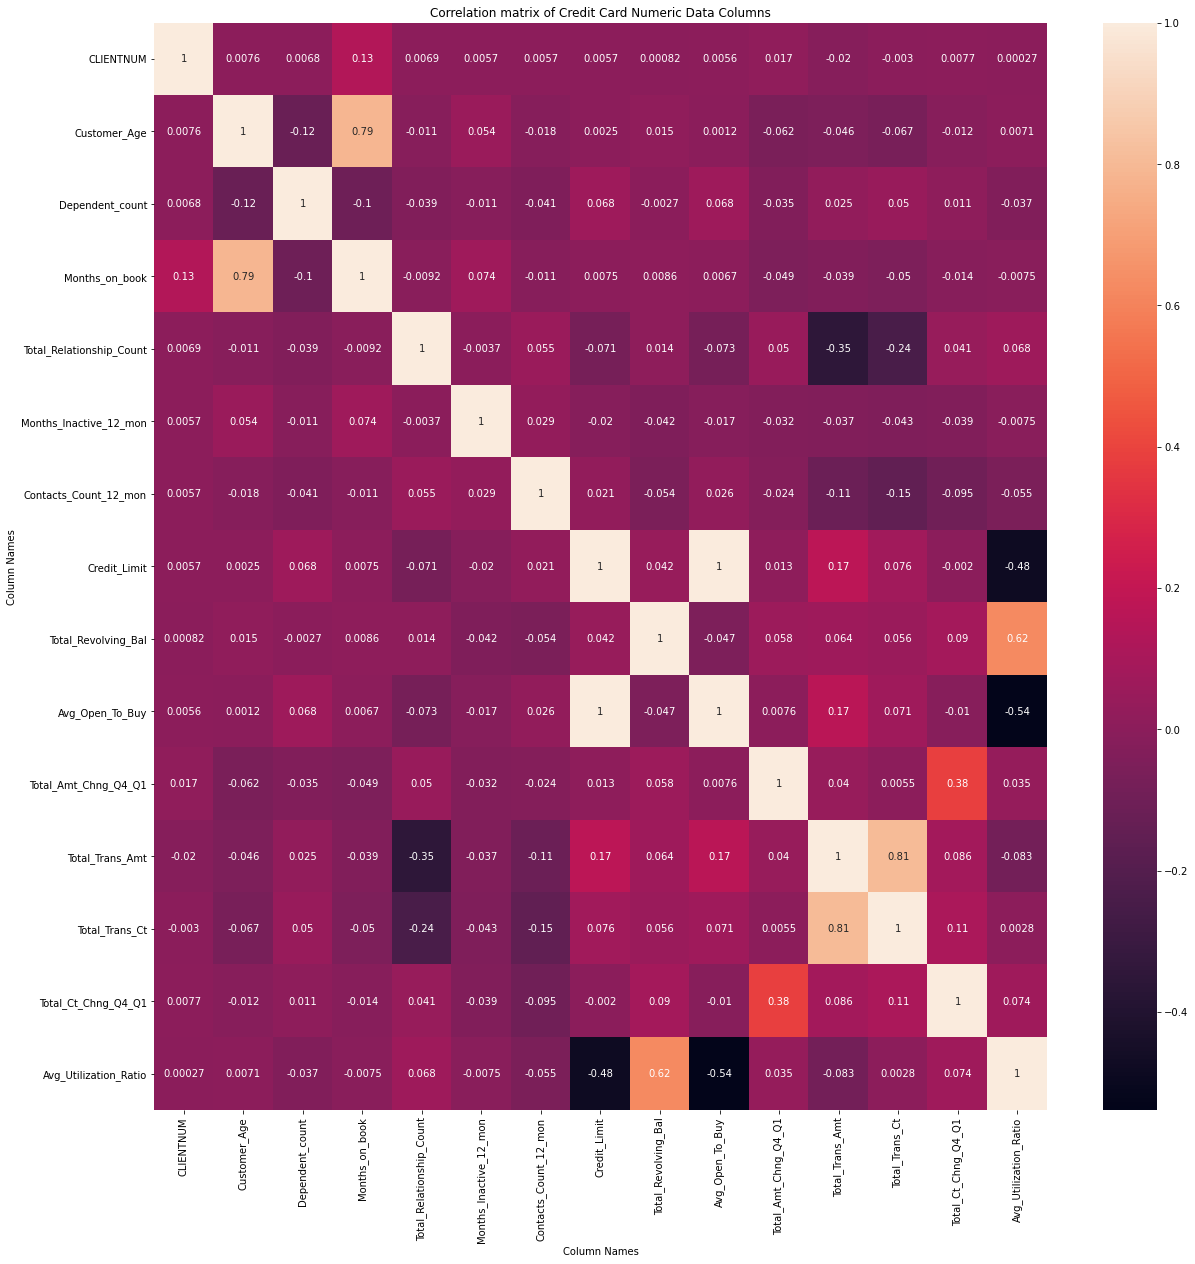

In [4]:

correlation_mat = data_continuous_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of Credit Card Numeric Data Columns")

plt.xlabel("Column Names")

plt.ylabel("Column Names")

plt.savefig('../Images/correlation_matrix.png')

In [5]:
# We will convert the given matrix into a one-dimensional Series of values

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

CLIENTNUM                 CLIENTNUM                   1.000000
                          Customer_Age                0.007613
                          Dependent_count             0.006772
                          Months_on_book              0.134588
                          Total_Relationship_Count    0.006907
                          Months_Inactive_12_mon      0.005729
                          Contacts_Count_12_mon       0.005694
                          Credit_Limit                0.005708
                          Total_Revolving_Bal         0.000825
                          Avg_Open_To_Buy             0.005633
                          Total_Amt_Chng_Q4_Q1        0.017369
                          Total_Trans_Amt            -0.019692
                          Total_Trans_Ct             -0.002961
                          Total_Ct_Chng_Q4_Q1         0.007696
                          Avg_Utilization_Ratio       0.000266
Customer_Age              CLIENTNUM                   0

In [6]:
# Sort these values using the sort_values() method of the Pandas Series
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Avg_Open_To_Buy           Avg_Utilization_Ratio      -0.538808
Avg_Utilization_Ratio     Avg_Open_To_Buy            -0.538808
                          Credit_Limit               -0.482965
Credit_Limit              Avg_Utilization_Ratio      -0.482965
Total_Relationship_Count  Total_Trans_Amt            -0.347229
Total_Trans_Amt           Total_Relationship_Count   -0.347229
Total_Relationship_Count  Total_Trans_Ct             -0.241891
Total_Trans_Ct            Total_Relationship_Count   -0.241891
                          Contacts_Count_12_mon      -0.152213
Contacts_Count_12_mon     Total_Trans_Ct             -0.152213
Dependent_count           Customer_Age               -0.122254
Customer_Age              Dependent_count            -0.122254
Total_Trans_Amt           Contacts_Count_12_mon      -0.112774
Contacts_Count_12_mon     Total_Trans_Amt            -0.112774
Months_on_book            Dependent_count            -0.103062
Dependent_count           Months_on_book             -0

In [7]:
# Selecting negative correlation pairs
negative_pairs = sorted_pairs[sorted_pairs < 0]

print(negative_pairs)

Avg_Open_To_Buy           Avg_Utilization_Ratio      -0.538808
Avg_Utilization_Ratio     Avg_Open_To_Buy            -0.538808
                          Credit_Limit               -0.482965
Credit_Limit              Avg_Utilization_Ratio      -0.482965
Total_Relationship_Count  Total_Trans_Amt            -0.347229
Total_Trans_Amt           Total_Relationship_Count   -0.347229
Total_Relationship_Count  Total_Trans_Ct             -0.241891
Total_Trans_Ct            Total_Relationship_Count   -0.241891
                          Contacts_Count_12_mon      -0.152213
Contacts_Count_12_mon     Total_Trans_Ct             -0.152213
Dependent_count           Customer_Age               -0.122254
Customer_Age              Dependent_count            -0.122254
Total_Trans_Amt           Contacts_Count_12_mon      -0.112774
Contacts_Count_12_mon     Total_Trans_Amt            -0.112774
Months_on_book            Dependent_count            -0.103062
Dependent_count           Months_on_book             -0

In [8]:
# Filter strong correlation pairs (magnitude greater than 0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Avg_Open_To_Buy           Avg_Utilization_Ratio      -0.538808
Avg_Utilization_Ratio     Avg_Open_To_Buy            -0.538808
                          Total_Revolving_Bal         0.624022
Total_Revolving_Bal       Avg_Utilization_Ratio       0.624022
Customer_Age              Months_on_book              0.788912
Months_on_book            Customer_Age                0.788912
Total_Trans_Amt           Total_Trans_Ct              0.807192
Total_Trans_Ct            Total_Trans_Amt             0.807192
Avg_Open_To_Buy           Credit_Limit                0.995981
Credit_Limit              Avg_Open_To_Buy             0.995981
CLIENTNUM                 CLIENTNUM                   1.000000
Credit_Limit              Credit_Limit                1.000000
Total_Trans_Ct            Total_Trans_Ct              1.000000
Total_Trans_Amt           Total_Trans_Amt             1.000000
Total_Amt_Chng_Q4_Q1      Total_Amt_Chng_Q4_Q1        1.000000
Avg_Open_To_Buy           Avg_Open_To_Buy             1

# Correlation Between Categorical Variables

In [9]:
categorical_data_df = data_df[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category',
                               'Card_Category']]
categorical_data_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


### Here we have 5 category predictors and 1 category response. Attrition_Flag, the response column represents if customer left the bank or not.

In [10]:
from sklearn.preprocessing import LabelEncoder

#Before performig Ch-Square test we have to make sure data is label encoded
label_encoder = LabelEncoder()
categorical_data_df['Attrition_Flag'] = label_encoder.fit_transform(categorical_data_df['Attrition_Flag']).copy()
categorical_data_df['Gender'] = label_encoder.fit_transform(categorical_data_df['Gender']).copy()
categorical_data_df['Education_Level'] = label_encoder.fit_transform(categorical_data_df['Education_Level']).copy()
categorical_data_df['Marital_Status'] = label_encoder.fit_transform(categorical_data_df['Marital_Status']).copy()
categorical_data_df['Income_Category'] = label_encoder.fit_transform(categorical_data_df['Income_Category']).copy()
categorical_data_df['Card_Category'] = label_encoder.fit_transform(categorical_data_df['Card_Category']).copy()
categorical_data_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,1,3,1,2,0
1,1,0,2,2,4,0
2,1,1,2,1,3,0
3,1,0,3,3,4,0
4,1,1,5,1,2,0


### Chi-Square test

In [11]:
from sklearn.feature_selection import chi2
X = categorical_data_df.drop('Attrition_Flag',axis=1)
y = categorical_data_df['Attrition_Flag']

chi_scores = chi2(X,y)
chi_scores

(array([7.4432227 , 0.33923111, 1.30275451, 2.47516959, 0.98612022]),
 array([0.00636758, 0.56027338, 0.25371069, 0.11565697, 0.32069248]))

### Above, the first array represents chi square values and second array represnts p-values. Let us separate the p-values for further analysis

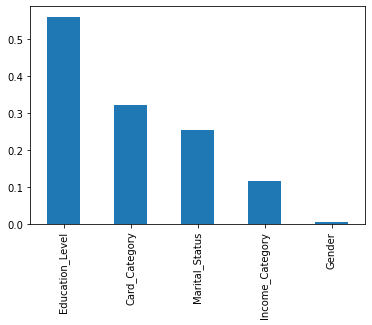

In [12]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
#plt.savefig('chi-squareTest.png')

In [13]:
# To get the different categories in each categorical column and get a count.
for col in categorical_data_df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(categorical_data_df[col].value_counts().head(10))

----------------------------------------Attrition_Flag---------------------------------------- - 

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

----------------------------------------Gender---------------------------------------- - 

0    5358
1    4769
Name: Gender, dtype: int64

----------------------------------------Education_Level---------------------------------------- - 

2    3128
3    2013
6    1519
5    1487
0    1013
4     516
1     451
Name: Education_Level, dtype: int64

----------------------------------------Marital_Status---------------------------------------- - 

1    4687
2    3943
3     749
0     748
Name: Marital_Status, dtype: int64

----------------------------------------Income_Category---------------------------------------- - 

4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: Income_Category, dtype: int64

----------------------------------------Card_Category---------------------------------------- - 

0    9436
3     555
1     116
2      20
Name: Card_Category, dtype: int64

# Correlation Between Categorical and Continuous Variables

In [14]:
data_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
index = pd.MultiIndex.from_product([['CLIENTNUM','Customer_Age', 'Dependent_count','Months_on_book','Months_Inactive_12_mon',
                                    'Contacts_Count_12_mon','Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                                     'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                     'Avg_Utilization_Ratio'],
                                    ['Attrition_Flag','Gender', 'Education_Level','Marital_Status','Income_Category',
                                     'Card_Category']],
                                   names=['cont', 'cat'])
index

MultiIndex([(             'CLIENTNUM',  'Attrition_Flag'),
            (             'CLIENTNUM',          'Gender'),
            (             'CLIENTNUM', 'Education_Level'),
            (             'CLIENTNUM',  'Marital_Status'),
            (             'CLIENTNUM', 'Income_Category'),
            (             'CLIENTNUM',   'Card_Category'),
            (          'Customer_Age',  'Attrition_Flag'),
            (          'Customer_Age',          'Gender'),
            (          'Customer_Age', 'Education_Level'),
            (          'Customer_Age',  'Marital_Status'),
            (          'Customer_Age', 'Income_Category'),
            (          'Customer_Age',   'Card_Category'),
            (       'Dependent_count',  'Attrition_Flag'),
            (       'Dependent_count',          'Gender'),
            (       'Dependent_count', 'Education_Level'),
            (       'Dependent_count',  'Marital_Status'),
            (       'Dependent_count', 'Income_Category'

In [16]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
tables = []
for cont_var,cat_var in index:
    model = ols('{} ~ {}'.format(cont_var,cat_var), data=data_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    tables.append(anova_table)

df_anova = pd.concat(tables, keys=index, axis=0)
df_anova_styled = df_anova.style.background_gradient()
df_anova_styled

In [18]:
data_df.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [17]:
import dataframe_image as dfi
dfi.export(df_anova_styled, 'AnnovaTable.png')

ValueError: Your Styled DataFrame has more than 100 rows and will produce a huge image file, possibly causing your computer to crash. Override this error by explicitly setting `max_rows` to -1 for all columns. Styled DataFrames are unable to select a subset of rows or columns and therefore do not work with the `max_rows` and `max_cols` parameters

In [ ]:
# The Chi-Squared Test for Independence for Gender and Education_Level
p_value =[]
from scipy.stats import chi2_contingency 
import numpy as np
# Build contingency table to format the data into frequency counts
contingency_table = pd.crosstab(categorical_data_df['Gender'], categorical_data_df['Education_Level'], margins = True)
value = np.array([contingency_table.iloc[0][0:5].values,
                  contingency_table.iloc[1][0:5].values])
p_value.append(chi2_contingency(value)[1])
print(p_value)
#print(f'Chi-Squared Statistic, p-value and DOF: {chi2_contingency(value)[1:2]}')

In [ ]:
# Build contingency table to format the data into frequency counts
contingency_table = pd.crosstab(categorical_data_df['Gender'], categorical_data_df['Marital_Status'], margins = True)
value = np.array([contingency_table.iloc[0][0:5].values,
                  contingency_table.iloc[1][0:5].values])
p_value.append(chi2_contingency(value)[1])
print(p_value)

In [ ]:
# Seaborn visualization library
import seaborn as sns

# Create the default pairplot
sns.pairplot(data_continuous_df)